### Print directory tree

In [2]:
import os

# Skip file extensions and folder names
SKIP_EXTENSIONS = {".jpg", ".png", ".mat", ".bmp", ".jpeg" ,".txt", ".db", ".gitsave", ".pth"}
SKIP_DIR_NAMES = {"__pycache__", ".ipynb_checkpoints"}

def print_tree(root_path, indent="", max_items=10):
    try:
        items = os.listdir(root_path)
    except PermissionError:
        print(indent + "Permission denied")
        return

    # Filter items
    filtered = []
    for item in sorted(items):
        full_path = os.path.join(root_path, item)
        if os.path.isdir(full_path):
            if item in SKIP_DIR_NAMES:
                continue
        else:
            _, ext = os.path.splitext(item)
            if ext.lower() in SKIP_EXTENSIONS:
                continue
        filtered.append(item)

    total_items = len(filtered)
    display_items = filtered[:max_items]

    for i, item in enumerate(display_items):
        full_path = os.path.join(root_path, item)
        is_last = (i == len(display_items) - 1)
        prefix = "└── " if is_last else "├── "
        print(indent + prefix + item)

        if os.path.isdir(full_path):
            new_indent = indent + ("    " if is_last else "│   ")
            print_tree(full_path, new_indent, max_items)

    if total_items > max_items:
        print(indent + "│   ...")

if __name__ == "__main__":
    root_directory = "." 
    print(root_directory)
    print_tree(root_directory)


.
├── celeba.ipynb
└── data
    ├── celeba_cleaned.csv
    ├── celeba_test.csv
    ├── celeba_train.csv
    ├── celeba_val.csv
    └── img_align_celeba


### Load CelebA attributes

In [1]:
import pandas as pd
import os

# Set base path
data_dir = "data"
attr_path = os.path.join(data_dir, "list_attr_celeba.txt")

# Load attribute file
df = pd.read_csv(attr_path, sep='\s+', skiprows=1)
print("Loaded list_attr_celeba.txt")

# Reset index to bring filename as a column
df.reset_index(inplace=True)
df = df.rename(columns={"index": "Filename"})

# Show shape and preview
print(f"Total samples: {len(df)}")
print("\nColumns:")
print(df.columns.tolist())
df.head()


Loaded list_attr_celeba.txt
Total samples: 202599

Columns:
['Filename', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


,Filename,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


### Convert -1 to binary

In [2]:
# Convert all -1 to 0 (for binary classification: 0 = absent, 1 = present)
df.iloc[:, 1:] = (df.iloc[:, 1:] == 1).astype(int)

# Confirm conversion
for col in df.columns[1:]:
    uniques = sorted(df[col].unique().tolist())
    print(f"{col:25} Unique values: {uniques}")



5_o_Clock_Shadow          Unique values: [0, 1]
Arched_Eyebrows           Unique values: [0, 1]
Attractive                Unique values: [0, 1]
Bags_Under_Eyes           Unique values: [0, 1]
Bald                      Unique values: [0, 1]
Bangs                     Unique values: [0, 1]
Big_Lips                  Unique values: [0, 1]
Big_Nose                  Unique values: [0, 1]
Black_Hair                Unique values: [0, 1]
Blond_Hair                Unique values: [0, 1]
Blurry                    Unique values: [0, 1]
Brown_Hair                Unique values: [0, 1]
Bushy_Eyebrows            Unique values: [0, 1]
Chubby                    Unique values: [0, 1]
Double_Chin               Unique values: [0, 1]
Eyeglasses                Unique values: [0, 1]
Goatee                    Unique values: [0, 1]
Gray_Hair                 Unique values: [0, 1]
Heavy_Makeup              Unique values: [0, 1]
High_Cheekbones           Unique values: [0, 1]
Male                      Unique values:

### Save cleaned attributes

In [3]:
# Save cleaned data
df.to_csv("data/celeba_cleaned.csv", index=False)
print("Saved cleaned labels to: data/celeba_cleaned.csv")


Saved cleaned labels to: data/celeba_cleaned.csv


### Verify image files

In [4]:
import os
import pandas as pd

# Paths
img_dir = "data/img_align_celeba"
df = pd.read_csv("data/celeba_cleaned.csv")

# Check if images exist
df["exists"] = df["Filename"].apply(lambda x: os.path.exists(os.path.join(img_dir, x)))

# Report
total = len(df)
found = df["exists"].sum()
missing = total - found

print(f"Total referenced images: {total}")
print(f"Found in folder:         {found}")
print(f"Missing:                 {missing}")
print("\nSample missing files:")
print(df[df["exists"] == False]["Filename"].head())

# Drop exists column
df = df.drop(columns=["exists"])


Total referenced images: 202599
Found in folder:         202599
Missing:                 0

Sample missing files:
Series([], Name: Filename, dtype: object)


### Display random images

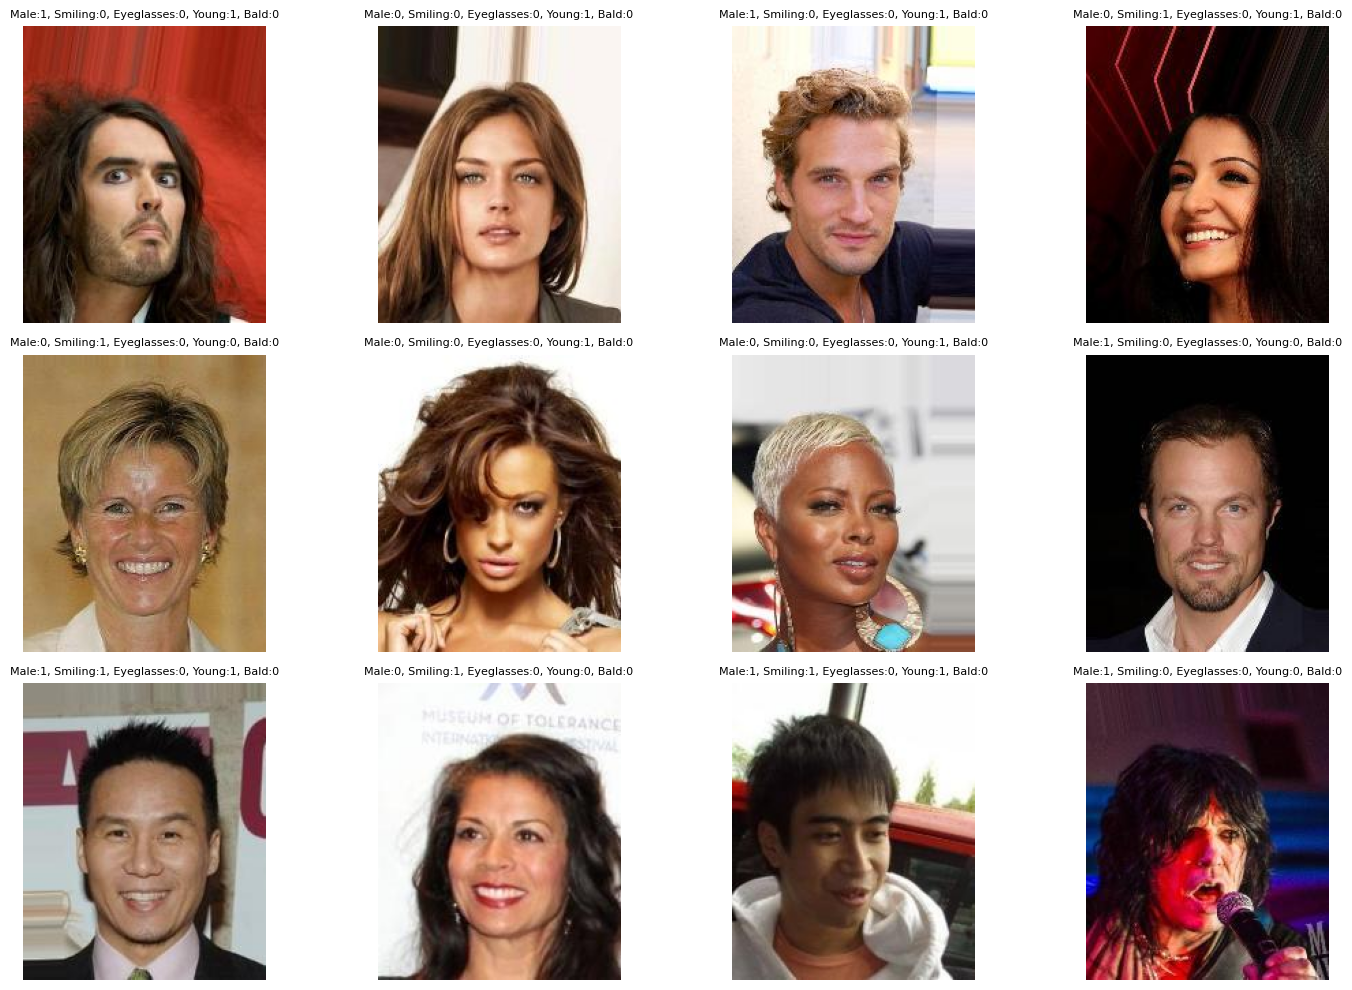

In [5]:
import matplotlib.pyplot as plt
import random
from PIL import Image

# a few attributes to display
display_cols = ["Male", "Smiling", "Eyeglasses", "Young", "Bald"]

# Sample random 12 rows
sample_df = df.sample(12, random_state=42)

# Plot
plt.figure(figsize=(15, 10))
for idx, row in enumerate(sample_df.itertuples()):
    img_path = os.path.join(img_dir, row.Filename)
    img = Image.open(img_path)

    attrs = ", ".join([f"{col}:{getattr(row, col)}" for col in display_cols])
    plt.subplot(3, 4, idx + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(attrs, fontsize=8)

plt.tight_layout()
plt.show()


### Barplot: attribute counts

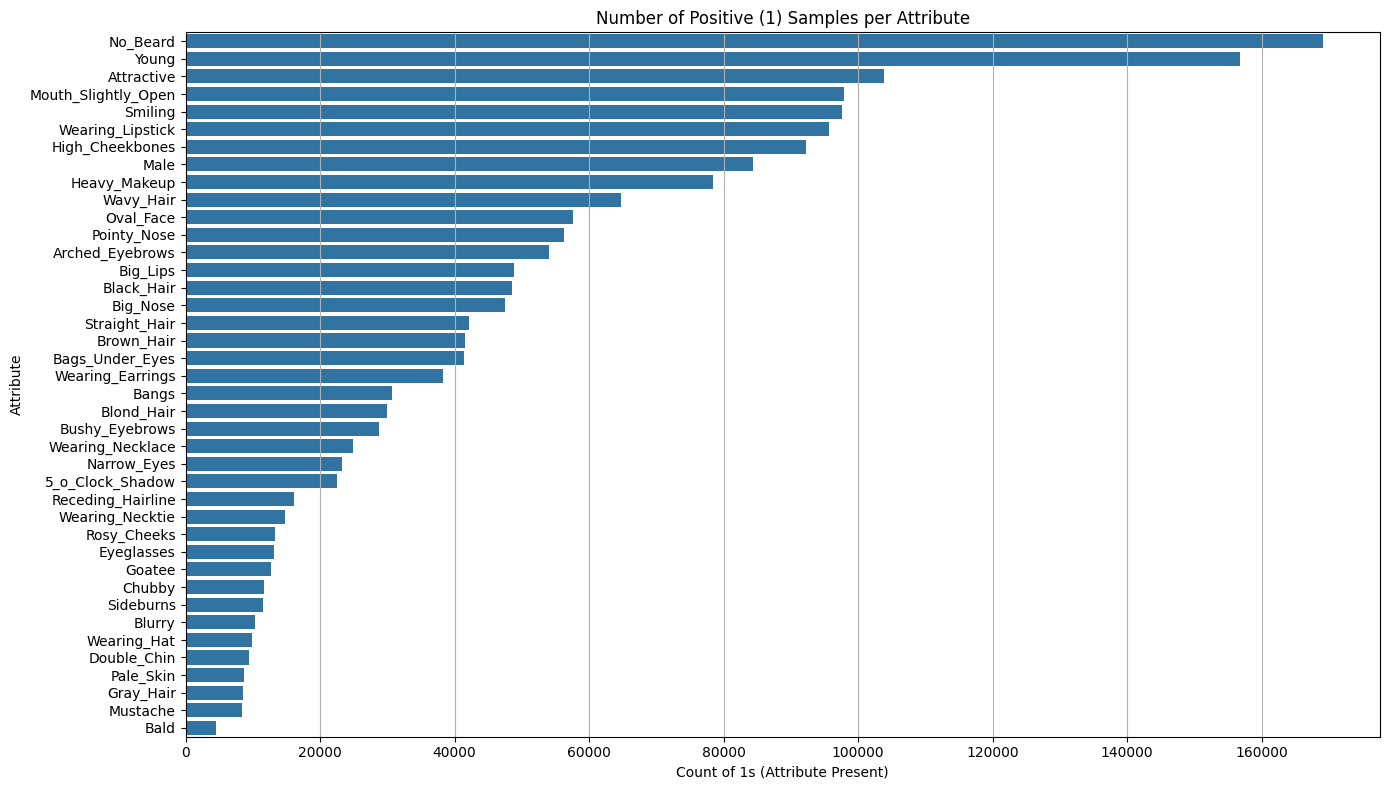

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned labels
df = pd.read_csv("data/celeba_cleaned.csv")

# Exclude Filename column
attr_cols = df.columns[1:]

# Count 1s for each label
label_counts = df[attr_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=label_counts.values, y=label_counts.index)
plt.title("Number of Positive (1) Samples per Attribute")
plt.xlabel("Count of 1s (Attribute Present)")
plt.ylabel("Attribute")
plt.grid(axis="x")
plt.tight_layout()
plt.show()


### Heatmap: attribute correlation

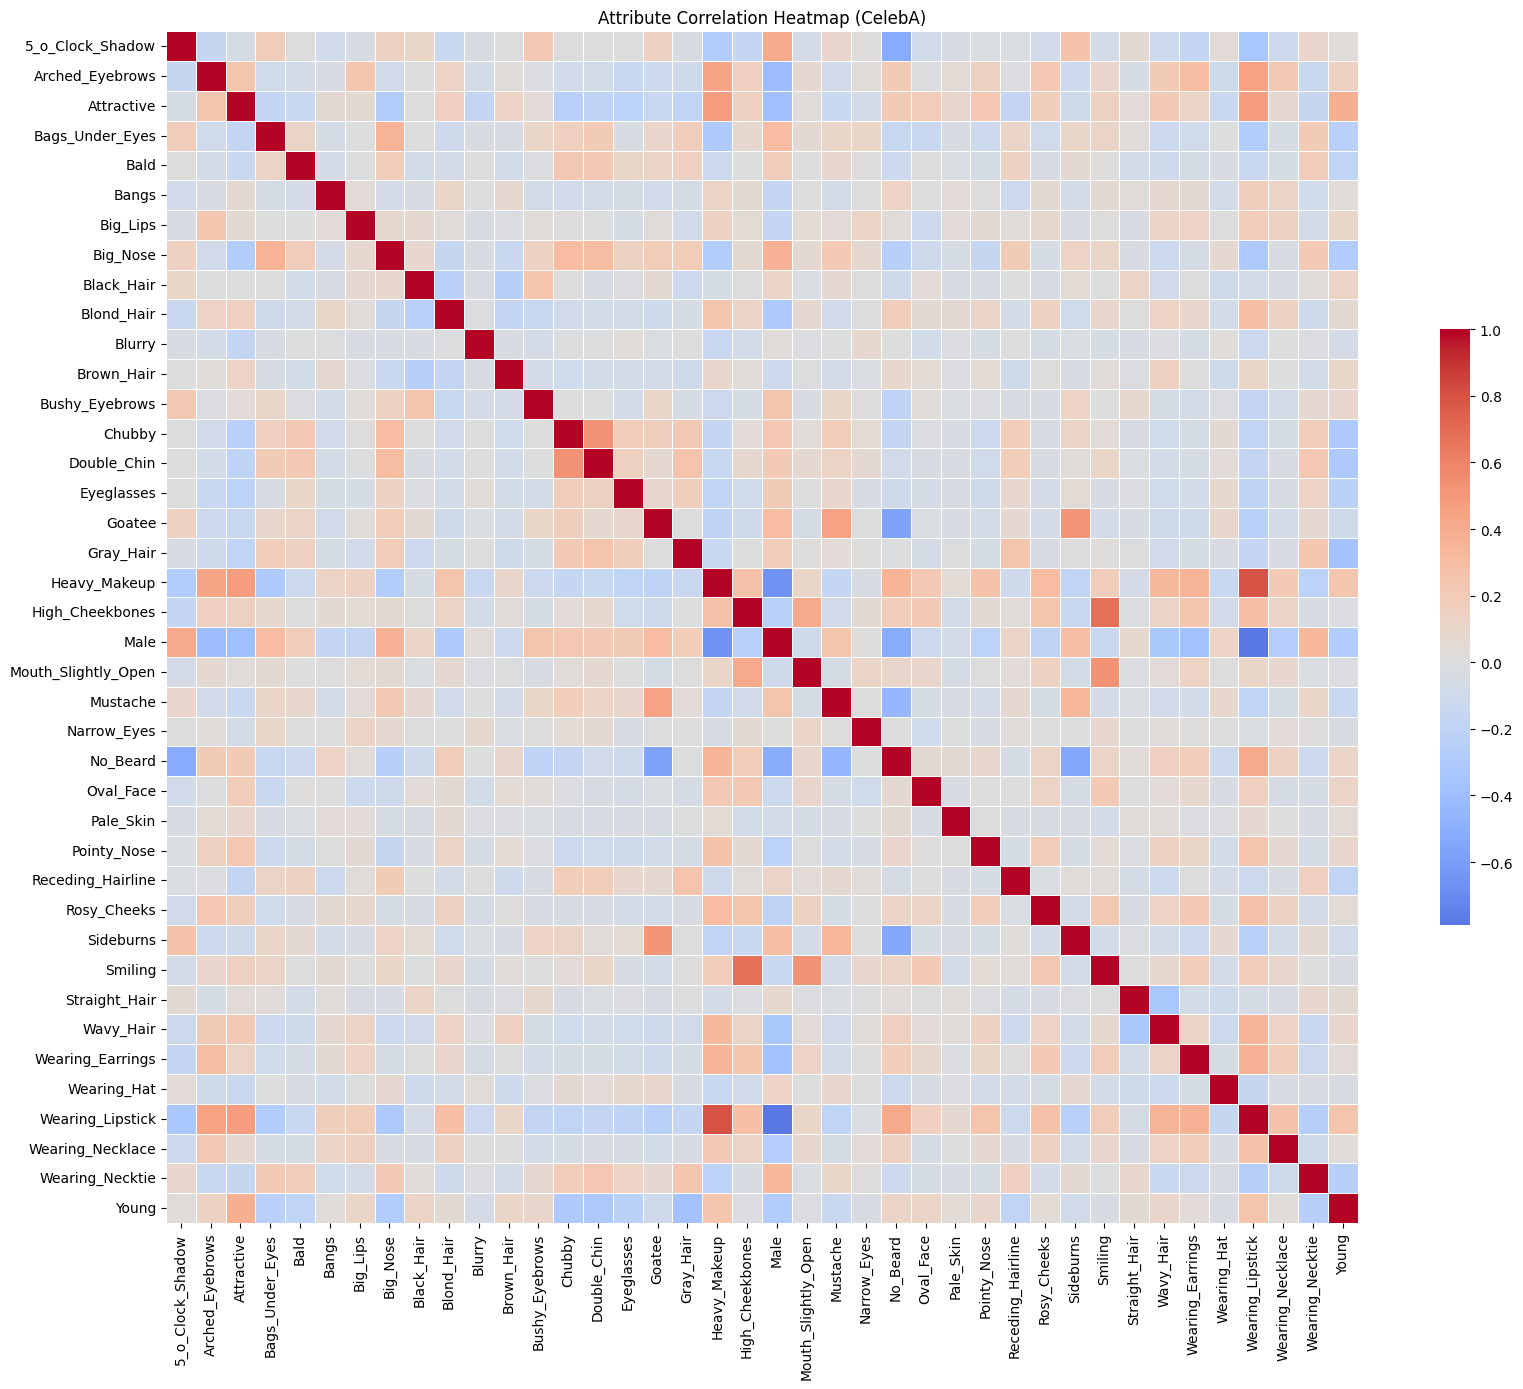

In [7]:
plt.figure(figsize=(18, 14))
sns.heatmap(
    df.drop(columns=["Filename"]).corr(),
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)
plt.title("Attribute Correlation Heatmap (CelebA)")
plt.tight_layout()
plt.show()


### Plot label distribution

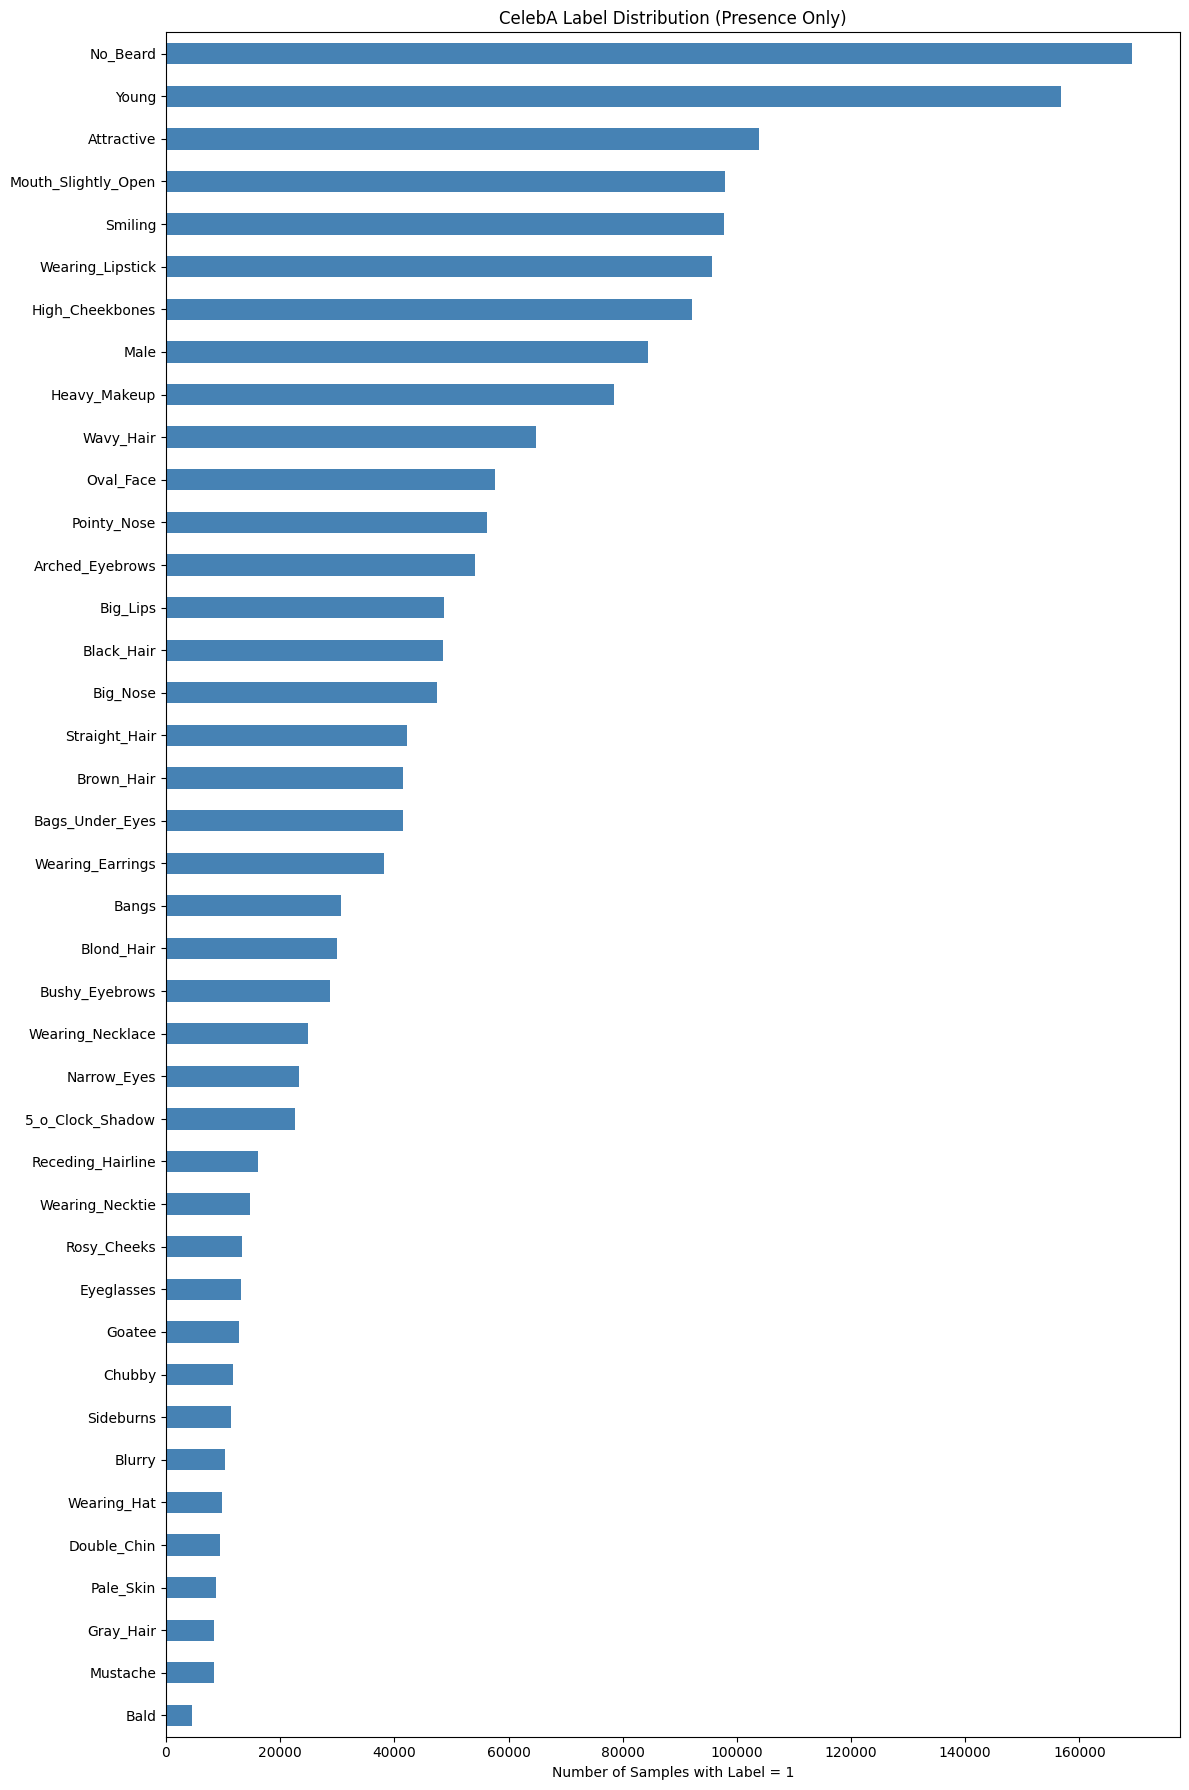

In [8]:
import matplotlib.pyplot as plt

# Exclude filename column
label_counts = df.iloc[:, 1:].apply(pd.Series.value_counts).T
label_counts.columns = ['Absent (0)', 'Present (1)']
label_counts = label_counts.fillna(0).astype(int)

# Plot
plt.figure(figsize=(12, 18))
label_counts.sort_values('Present (1)', ascending=True)['Present (1)'].plot(kind='barh', color='steelblue')
plt.title('CelebA Label Distribution (Presence Only)')
plt.xlabel('Number of Samples with Label = 1')
plt.tight_layout()
plt.show()


### Print label stats summary

In [10]:
# Count 1s and 0s for each attribute
label_counts = {}
for col in df.columns[1:]:
    counts = df[col].value_counts().to_dict()
    label_counts[col] = {
        '1 (Present)': counts.get(1, 0),
        '0 (Absent)': counts.get(0, 0)
    }

# Print summary
for label, counts in sorted(label_counts.items(), key=lambda x: -x[1]['1 (Present)']):
    print(f"{label:<24} Present: {counts['1 (Present)']:<6} | Absent: {counts['0 (Absent)']}")


No_Beard                 Present: 169158 | Absent: 33441
Young                    Present: 156734 | Absent: 45865
Attractive               Present: 103833 | Absent: 98766
Mouth_Slightly_Open      Present: 97942  | Absent: 104657
Smiling                  Present: 97669  | Absent: 104930
Wearing_Lipstick         Present: 95715  | Absent: 106884
High_Cheekbones          Present: 92189  | Absent: 110410
Male                     Present: 84434  | Absent: 118165
Heavy_Makeup             Present: 78390  | Absent: 124209
Wavy_Hair                Present: 64744  | Absent: 137855
Oval_Face                Present: 57567  | Absent: 145032
Pointy_Nose              Present: 56210  | Absent: 146389
Arched_Eyebrows          Present: 54090  | Absent: 148509
Big_Lips                 Present: 48785  | Absent: 153814
Black_Hair               Present: 48472  | Absent: 154127
Big_Nose                 Present: 47516  | Absent: 155083
Straight_Hair            Present: 42222  | Absent: 160377
Brown_Hair       

### Drop biased attributes

In [11]:
# Attributes to drop: biased or severely imbalanced
drop_attrs = [
    "Attractive",        # bias
    "Bald",              # ~2.2%
    "Mustache",          # ~4.2%
    "Gray_Hair",         # ~4.2%
    "Wearing_Hat"        # ~4.8%
]

# Drop columns
df_cleaned = df.drop(columns=drop_attrs)

# Save cleaned dataset
df_cleaned.to_csv("data/celeba_cleaned.csv", index=False)

print("Cleaned dataset saved as: data/celeba_cleaned.csv")


Cleaned dataset saved as: data/celeba_cleaned.csv


### Partition summary

In [12]:
import pandas as pd

# Load evaluation partition file
partition_file = "data/list_eval_partition.txt"
partitions = pd.read_csv(partition_file, sep=r"\s+", header=None, names=["Filename", "Partition"])

# Count samples per partition
partition_counts = partitions["Partition"].value_counts().sort_index()
total = partition_counts.sum()

# Print results with percentages
print("Partition breakdown:")
for k, v in partition_counts.items():
    label = {0: "Train", 1: "Validation", 2: "Test"}[k]
    pct = (v / total) * 100
    print(f"{label:<10} Samples: {v:6} ({pct:.2f}%)")


Partition breakdown:
Train      Samples: 162770 (80.34%)
Validation Samples:  19867 (9.81%)
Test       Samples:  19962 (9.85%)


### Split and save dataset

In [13]:
import pandas as pd

# Load partition file
partition_path = "data/list_eval_partition.txt"
partition_df = pd.read_csv(partition_path, sep=r"\s+", header=None, names=["Filename", "Partition"])

# Load cleaned label file
cleaned_path = "data/celeba_cleaned.csv"
cleaned_df = pd.read_csv(cleaned_path)

# Merge on filename
merged_df = cleaned_df.merge(partition_df, on="Filename", how="inner")

# Split based on partition
train_df = merged_df[merged_df["Partition"] == 0].drop(columns=["Partition"])
val_df   = merged_df[merged_df["Partition"] == 1].drop(columns=["Partition"])
test_df  = merged_df[merged_df["Partition"] == 2].drop(columns=["Partition"])

# Save to CSV
train_df.to_csv("data/celeba_train.csv", index=False)
val_df.to_csv("data/celeba_val.csv", index=False)
test_df.to_csv("data/celeba_test.csv", index=False)

print("Saved:")
print(f"Train: {len(train_df)} samples")
print(f"Val:   {len(val_df)} samples")
print(f"Test:  {len(test_df)} samples")


Saved:
Train: 162770 samples
Val:   19867 samples
Test:  19962 samples


### Define dataset class

In [14]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms

# Parameters
img_dir = "data/img_align_celeba"
img_size = 224

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

val_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Dataset class
class CelebADataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.transform = transform
        self.labels = self.df.drop(columns=["Filename"]).values.astype("float32")

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["Filename"])
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label


### Initialize DataLoaders

In [15]:
from torch.utils.data import DataLoader

# Paths to CSVs
train_csv = "data/celeba_train.csv"
val_csv = "data/celeba_val.csv"
test_csv = "data/celeba_test.csv"

# Dataset instances
train_dataset = CelebADataset(train_csv, img_dir, transform=train_transform)
val_dataset = CelebADataset(val_csv, img_dir, transform=val_transform)
test_dataset = CelebADataset(test_csv, img_dir, transform=val_transform)

# DataLoaders
batch_size = 64  # Adjust based on your GPU memory

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

print("DataLoaders ready.")


DataLoaders ready.


### Set CUDA or CPU device

In [16]:
# Set device
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


### Create model with ResNet50

In [17]:
from torchvision.models import resnet50, ResNet50_Weights
import torch.nn as nn

# Load ResNet50 with pretrained weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)

# Replace final layer for 35 binary outputs
num_labels = 35
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_labels)

# Move to GPU
model = model.to(device)
print(f"Model ready with {num_labels} output labels.")


Model ready with 35 output labels.


### Quick check dataset

In [18]:
df = pd.read_csv("data/celeba_cleaned.csv")
print("Shape:", df.shape)
print("First few columns:", df.columns[:10])
print("Unique values in first row (excluding filename):", set(df.iloc[0, 1:]))


Shape: (202599, 36)
First few columns: Index(['Filename', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes',
       'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry'],
      dtype='object')
Unique values in first row (excluding filename): {0, 1}


### Sample batch preview

In [19]:
images, labels = next(iter(train_loader))
print("Image shape:", images.shape)
print("Labels shape:", labels.shape)
print("Labels dtype:", labels.dtype)
print("Label sample:\n", labels[0])


Image shape: torch.Size([64, 3, 224, 224])
Labels shape: torch.Size([64, 35])
Labels dtype: torch.float32
Label sample:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])


### Setup training components

In [20]:
import torch.nn as nn
from torch.optim import AdamW
from torch.amp import GradScaler, autocast

# Loss function
criterion = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

# Scheduler
epochs = 30
steps_per_epoch = len(train_loader)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=1e-3,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    pct_start=0.2,
    anneal_strategy="cos"
)

# AMP
scaler = GradScaler()

print("Loss, optimizer, scheduler, and AMP setup complete.")


Loss, optimizer, scheduler, and AMP setup complete.


### Training loop with AMP

In [21]:
import torch
from torch.amp import GradScaler, autocast
from tqdm import tqdm
import torch.nn.functional as F

# Setup
criterion = torch.nn.BCEWithLogitsLoss()
scaler = GradScaler()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=1e-3,
    steps_per_epoch=len(train_loader),
    epochs=30
)

best_val_acc = 0.0
num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    pbar = tqdm(train_loader, desc="Training", leave=False)

    for images, labels in pbar:
        images = images.to(device)
        labels = labels.to(device).float()

        optimizer.zero_grad()

        with autocast(device_type="cuda"):
            outputs = model(images)
            loss = criterion(outputs, labels)

        if not torch.isfinite(loss):
            print("!!! Skipping batch due to non-finite loss !!!")
            continue

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        running_loss += loss.item()
        preds = (torch.sigmoid(outputs) > 0.5).float()
        correct += (preds == labels).float().detach().sum().item()
        total += labels.numel()

        current_acc = 100 * correct / total
        pbar.set_postfix({
            "Loss": f"{loss.item():.4f}",
            "Acc": f"{current_acc:.2f}%"
        })


    train_acc = 100 * correct / total
    print(f"Train Loss: {running_loss / len(train_loader):.4f}")
    print(f"Train Accuracy: {train_acc:.2f}%")

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validating", leave=False):
            images = images.to(device)
            labels = labels.to(device).float()

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            preds = (torch.sigmoid(outputs.clamp(min=-10, max=10)) > 0.5).float()
            val_correct += (preds == labels).float().detach().sum().item()
            val_total += labels.numel()

    avg_val_loss = val_loss / len(val_loader)
    val_acc = 100 * val_correct / val_total

    print(f"Validation — Loss: {avg_val_loss:.4f}, Accuracy: {val_acc:.2f}%")
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_celeba_model.pth")
        print(f"Best Validation Accuracy so far: {best_val_acc:.2f}%")
        print("### Validation improved. Model saved ###")
    else:
        print(f"Best Validation Accuracy so far: {best_val_acc:.2f}%")




Epoch 1/30


Train Loss: 0.2362
Train Accuracy: 89.77%


Validation — Loss: 0.1967, Accuracy: 91.43%
Best Validation Accuracy so far: 91.43%
### Validation improved. Model saved ###

Epoch 2/30


Train Loss: 0.1973
Train Accuracy: 91.36%


Validation — Loss: 0.1980, Accuracy: 91.36%
Best Validation Accuracy so far: 91.43%

Epoch 3/30


Train Loss: 0.1924
Train Accuracy: 91.56%


Validation — Loss: 0.1986, Accuracy: 91.30%
Best Validation Accuracy so far: 91.43%

Epoch 4/30


Train Loss: 0.1900
Train Accuracy: 91.66%


Validation — Loss: 0.1978, Accuracy: 91.32%
Best Validation Accuracy so far: 91.43%

Epoch 5/30


Train Loss: 0.1879
Train Accuracy: 91.75%


Validation — Loss: 0.1989, Accuracy: 91.36%
Best Validation Accuracy so far: 91.43%

Epoch 6/30


Train Loss: 0.1854
Train Accuracy: 91.86%


Validation — Loss: 0.1992, Accuracy: 91.31%
Best Validation Accuracy so far: 91.43%

Epoch 7/30


Train Loss: 0.1817
Train Accuracy: 92.03%


Validation — Loss: 0.1960, Accuracy: 91.47%
Best Validation Accuracy so far: 91.47%
### Validation improved. Model saved ###

Epoch 8/30


Train Loss: 0.1766
Train Accuracy: 92.25%


Validation — Loss: 0.2003, Accuracy: 91.14%
Best Validation Accuracy so far: 91.47%

Epoch 9/30


Train Loss: 0.1694
Train Accuracy: 92.58%


Validation — Loss: 0.2002, Accuracy: 91.24%
Best Validation Accuracy so far: 91.47%

Epoch 10/30


Train Loss: 0.1602
Train Accuracy: 93.02%


Validation — Loss: 0.1996, Accuracy: 91.38%
Best Validation Accuracy so far: 91.47%

Epoch 11/30


Train Loss: 0.1484
Train Accuracy: 93.58%


Validation — Loss: 0.2125, Accuracy: 91.10%
Best Validation Accuracy so far: 91.47%

Epoch 12/30


Train Loss: 0.1350
Train Accuracy: 94.22%


Validation — Loss: 0.2126, Accuracy: 91.18%
Best Validation Accuracy so far: 91.47%

Epoch 13/30


Train Loss: 0.1199
Train Accuracy: 94.93%


Validation — Loss: 0.2226, Accuracy: 90.92%
Best Validation Accuracy so far: 91.47%

Epoch 14/30


Train Loss: 0.1038
Train Accuracy: 95.69%


Validation — Loss: 0.2355, Accuracy: 90.82%
Best Validation Accuracy so far: 91.47%

Epoch 15/30


Train Loss: 0.0874
Train Accuracy: 96.44%


Validation — Loss: 0.2568, Accuracy: 90.77%
Best Validation Accuracy so far: 91.47%

Epoch 16/30


Train Loss: 0.0717
Train Accuracy: 97.14%


Validation — Loss: 0.2754, Accuracy: 90.66%
Best Validation Accuracy so far: 91.47%

Epoch 17/30


Train Loss: 0.0571
Train Accuracy: 97.80%


Validation — Loss: 0.2983, Accuracy: 90.58%
Best Validation Accuracy so far: 91.47%

Epoch 18/30


Train Loss: 0.0448
Train Accuracy: 98.34%


Validation — Loss: 0.3293, Accuracy: 90.44%
Best Validation Accuracy so far: 91.47%

Epoch 19/30


Train Loss: 0.0342
Train Accuracy: 98.78%


Validation — Loss: 0.3546, Accuracy: 90.50%
Best Validation Accuracy so far: 91.47%

Epoch 20/30


Train Loss: 0.0258
Train Accuracy: 99.12%


Validation — Loss: 0.3822, Accuracy: 90.56%
Best Validation Accuracy so far: 91.47%

Epoch 21/30


Train Loss: 0.0192
Train Accuracy: 99.39%


Validation — Loss: 0.4121, Accuracy: 90.78%
Best Validation Accuracy so far: 91.47%

Epoch 22/30


Train Loss: 0.0142
Train Accuracy: 99.58%


Validation — Loss: 0.4398, Accuracy: 90.74%
Best Validation Accuracy so far: 91.47%

Epoch 23/30


Train Loss: 0.0102
Train Accuracy: 99.72%


Validation — Loss: 0.4636, Accuracy: 90.70%
Best Validation Accuracy so far: 91.47%

Epoch 24/30


Train Loss: 0.0073
Train Accuracy: 99.82%


Validation — Loss: 0.4856, Accuracy: 90.75%
Best Validation Accuracy so far: 91.47%

Epoch 25/30


Train Loss: 0.0051
Train Accuracy: 99.89%


Validation — Loss: 0.5090, Accuracy: 90.78%
Best Validation Accuracy so far: 91.47%

Epoch 26/30


Train Loss: 0.0036
Train Accuracy: 99.93%


Validation — Loss: 0.5267, Accuracy: 90.78%
Best Validation Accuracy so far: 91.47%

Epoch 27/30


Train Loss: 0.0026
Train Accuracy: 99.96%


Validation — Loss: 0.5399, Accuracy: 90.78%
Best Validation Accuracy so far: 91.47%

Epoch 28/30


Train Loss: 0.0019
Train Accuracy: 99.98%


Validation — Loss: 0.5545, Accuracy: 90.82%
Best Validation Accuracy so far: 91.47%

Epoch 29/30


Train Loss: 0.0016
Train Accuracy: 99.98%


Validation — Loss: 0.5623, Accuracy: 90.78%
Best Validation Accuracy so far: 91.47%

Epoch 30/30


Train Loss: 0.0015
Train Accuracy: 99.99%


Validation — Loss: 0.5622, Accuracy: 90.81%
Best Validation Accuracy so far: 91.47%


### Evaluate on test set

In [23]:
# Load best model
model.load_state_dict(torch.load("best_celeba_model.pth"))
model.eval()

test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing", leave=False):
        images = images.to(device)
        labels = labels.to(device).float()

        outputs = model(images)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        preds = (torch.sigmoid(outputs.clamp(min=-10, max=10)) > 0.5).float()
        test_correct += (preds == labels).sum().item()
        test_total += labels.numel()

avg_test_loss = test_loss / len(test_loader)
test_acc = 100 * test_correct / test_total

print(f"\nTest — Loss: {avg_test_loss:.4f}, Accuracy: {test_acc:.2f}%")



Test — Loss: 0.2071, Accuracy: 90.76%


### Inference on single image

In [36]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import pandas as pd

# Image path
img_path = "Screenshot 2025-07-12 032746.png"

# Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Load and preprocess image
image = Image.open(img_path).convert("RGB")
image = transform(image).unsqueeze(0).to(device)

# Inference
model.eval()
with torch.no_grad():
    outputs = model(image)
    probs = torch.sigmoid(outputs).cpu().squeeze()

# Load attribute names
attrs = pd.read_csv("data/celeba_cleaned.csv").columns[1:].tolist()

# Predictions
preds = (probs > 0.5).int().tolist()

# Fix Male/Female logic
final_attrs = []
for attr, val in zip(attrs, preds):
    if attr == "Male":
        final_attrs.append("Male" if val == 1 else "Female")
    elif val == 1:
        final_attrs.append(attr)

# Output
print("Predicted attributes (present):")
print(final_attrs)


Predicted attributes (present):
['Bags_Under_Eyes', 'Bushy_Eyebrows', 'Goatee', 'High_Cheekbones', 'Male', 'Sideburns', 'Smiling', 'Young']
